<a href="https://colab.research.google.com/github/AlineSouzaSantos/Pyhton_Dados/blob/master/Estat%C3%ADstica_Frequ%C3%AAncias_e_Medidas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Frequencias e medidas

Você é uma pesquisadora de um cursinho para estudantes que querem ingressar na universidade em 2025. Seu objetivo é retirar informações da base de dados do enem do ano anterior para alinhar melhor as estratégias do cursinho para cada estudante. O dado possui 6 colunas, 5 delas representam as disciplinas do ENEM e uma o gênero das pessoas que fizeram a prova. No dado existe a representação de 1000 pessoas, sendo cada uma delas uma linha.

1. Qual das disciplinas tem a maior amplitude de nota?
2. Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se de remover todos os valores nulos quando considerar a mediana)


# Questão 1

#####Qual das disciplinas tem a maior amplitude de nota?

In [59]:
import pandas as pd
import json
import numpy as np

df = pd.read_json('enem_2023.json')
df.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


In [16]:
# Calcula a amplitude para cada disciplina
amplitudes = df.loc[:, ['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']].apply(lambda x: x.max() - x.min())

# Encontra a disciplina com a maior amplitude
disciplina_maior_amplitude = amplitudes.idxmax()

# Imprime o resultado
print(f"A disciplina com a maior amplitude de nota é: {disciplina_maior_amplitude}")

A disciplina com a maior amplitude de nota é: Redação


# Questão 2

######Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se de remover todos os valores nulos quando considerar a mediana)

In [18]:
# Calcula a média e a mediana para cada disciplina, removendo valores nulos para a mediana
medias = df.loc[:, ['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']].mean()
medianas = df.loc[:, ['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']].median()


# Imprime os resultados
print("Médias:")
print(medias)
print("\nMedianas:")
print(medianas)

Médias:
Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64

Medianas:
Linguagens              515.045250
Ciências humanas        524.519920
Ciências da natureza    500.479263
Matemática              533.247767
Redação                 635.273973
dtype: float64


# Questão 3

Considerando o curso de Ciência da Computação da UFPE, onde o peso cada uma das disciplinas ponderado:

a. Redação - 2

b. Matemática e suas Tecnologias - 4

c. Linguagens, Códigos e suas Tecnologias - 2

d. Ciências Humanas e suas Tecnologias - 1

e. Ciências da Natureza e suas Tecnologias - 1

Qual o desvio padrão e média das notas dos 500 estudantes mais bem colocados considerando esses pesos?

In [23]:
#Calcular a nota ponderada - Divide-se por 10 pois é a soma dos pesos
df['nota_ponderada'] = (df['Redação'] * 2 + df['Matemática'] * 4 + df['Linguagens'] * 2 + df['Ciências humanas'] * 1 + df['Ciências da natureza'] * 1) / 10

#Ordenar por nota ponderada e selecionar os 500 primeiros:
df_ordenado = df.sort_values(by=['nota_ponderada'], ascending=False)
top_500 = df_ordenado.head(500)

#Calcular a média e o desvio padrão da nota ponderada para os 500 primeiros:
media_top_500 = top_500['nota_ponderada'].mean()
desvio_padrao_top_500 = top_500['nota_ponderada'].std()

#Imprimir os resultados:
print(f"Média dos 500 estudantes mais bem colocados: {media_top_500}")
print(f"Desvio padrão dos 500 estudantes mais bem colocados: {desvio_padrao_top_500}")

Média dos 500 estudantes mais bem colocados: 557.2896772018769
Desvio padrão dos 500 estudantes mais bem colocados: 40.435866299464266


# Questão 4

Se todos esses estudantes aplicassem para ciência da computação e existem apenas 40 vagas, qual seria a variância e média da nota dos estudantes que entraram no curso de ciência da computação?

In [24]:
#Ordenar por nota ponderada e selecionar os 40 primeiros:
df_ordenado = df.sort_values(by=['nota_ponderada'], ascending=False)
top_40 = df_ordenado.head(40)

#Calcular a média e a variância da nota ponderada para os 40 primeiros:
media_top_40 = top_40['nota_ponderada'].mean()
variancia_top_40 = top_40['nota_ponderada'].var()

#Imprimir os resultados:
print(f"Média dos 40 estudantes que entraram: {media_top_40}")
print(f"Variância dos 40 estudantes que entraram: {variancia_top_40}")

Média dos 40 estudantes que entraram: 636.6827415075188
Variância dos 40 estudantes que entraram: 295.76750360041007


# Questão 5

Qual o valor do teto do terceiro quartil para as disciplinas de matemática e linguagens?

In [30]:
# Calcula o terceiro quartil para matemática e linguagens
terceiro_quartil_matematica = df['Matemática'].quantile(0.75)
terceiro_quartil_linguagens = df['Linguagens'].quantile(0.75)

# Calcula o teto do terceiro quartil (arredondando para cima)
teto_matematica = np.ceil(terceiro_quartil_matematica)
teto_linguagens = np.ceil(terceiro_quartil_linguagens)

# Imprime os resultados
print(f"Teto do terceiro quartil para matemática: {teto_matematica}")
print(f"Teto do terceiro quartil para linguagens: {teto_linguagens}")

Teto do terceiro quartil para matemática: 593.0
Teto do terceiro quartil para linguagens: 572.0


# Questão 6

Faça o histograma de Redação e Linguagens, de 20 em 20 pontos. Podemos dizer que são histogramas simétricos,  justifique e classifique se não assimétricas?

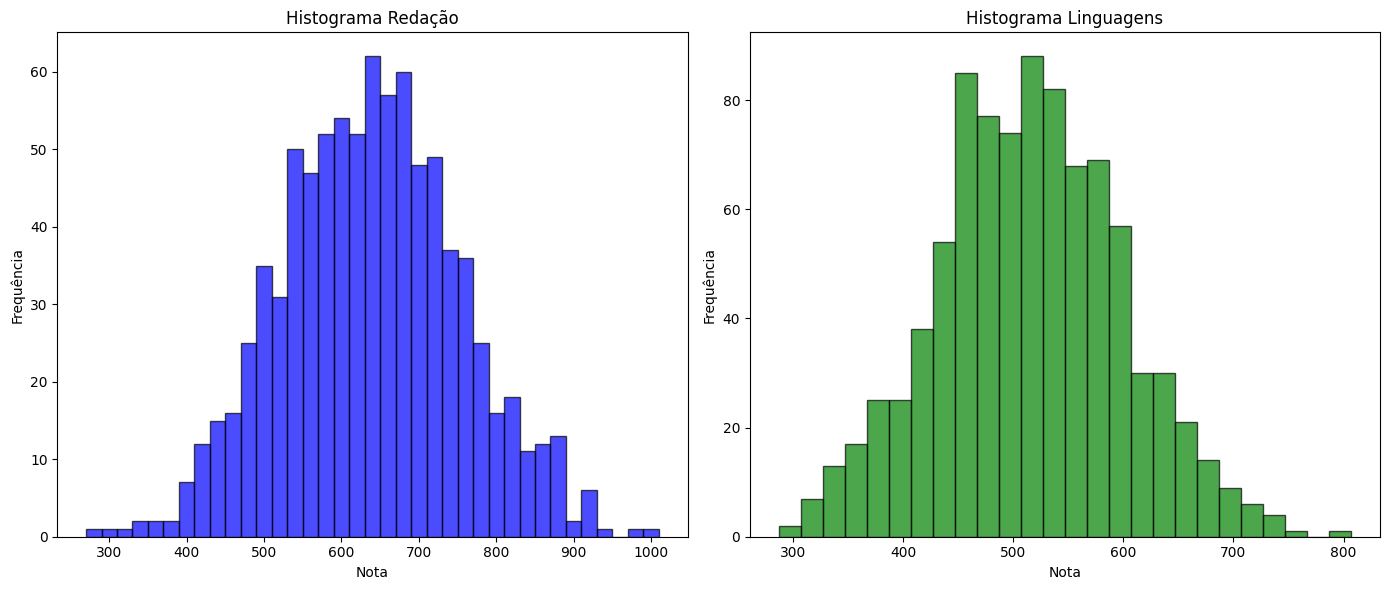

In [42]:
# Plotando histogramas para Redação e Linguagens com intervalos de 20 em 20 pontos
plt.figure(figsize=(14, 6))

# Histograma Redação
plt.subplot(1, 2, 1)
plt.hist(df['Redação'].dropna(), bins=range(int(df['Redação'].min()), int(df['Redação'].max()) + 20, 20), color='blue', alpha=0.7, edgecolor='black')
plt.title('Histograma Redação')
plt.xlabel('Nota')
plt.ylabel('Frequência')

# Histograma Linguagens
plt.subplot(1, 2, 2)
plt.hist(df['Linguagens'].dropna(), bins=range(int(df['Linguagens'].min()), int(df['Linguagens'].max()) + 20, 20), color='green', alpha=0.7, edgecolor='black')
plt.title('Histograma Linguagens')
plt.xlabel('Nota')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()



  O histograma de Redação é assimétrico à direita.
  
  O histograma de Linguagens é assimétrico à esquerda.


In [34]:
#Utilizando Pyhton para provar se é simétrico ou não
#Se o coeficiente de assimetria for próximo de 0, a distribuição é aproximadamente simétrica.
#Se o coeficiente de assimetria for positivo, a distribuição é assimétrica à direita (positiva).
#Se o coeficiente de assimetria for negativo, a distribuição é assimétrica à esquerda (negativa).

skewness_redacao = df['Redação'].skew()
skewness_linguagens = df['Linguagens'].skew()

print(f"Coeficiente de assimetria para Redação: {skewness_redacao}")
print(f"Coeficiente de assimetria para Linguagens: {skewness_linguagens}")

Coeficiente de assimetria para Redação: 0.06531797121273347
Coeficiente de assimetria para Linguagens: 0.07531804986140535


In [37]:
#Utilizando Pyhton para provar se é simétrico ou não
#Se a média for maior que a mediana, a distribuição é assimétrica à direita (positiva).
#Se a média for menor que a mediana, a distribuição é assimétrica à esquerda (negativa).
#Se a média for aproximadamente igual à mediana, a distribuição é aproximadamente simétrica.

media_redacao = df['Redação'].mean()
mediana_redacao = df['Redação'].median()

media_linguagens = df['Linguagens'].mean()
mediana_linguagens = df['Linguagens'].median()

print(f"Redação - Média: {media_redacao}, Mediana: {mediana_redacao}")
print(f"Linguagens - Média: {media_linguagens}, Mediana: {mediana_linguagens}")

Redação - Média: 637.7835320695872, Mediana: 635.27397319435
Linguagens - Média: 514.5248092106333, Mediana: 515.0452497632


# Questão 7

Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma opinião quanto a simetria? [plt.hist(dado, bins=_,range=[0, 1000])

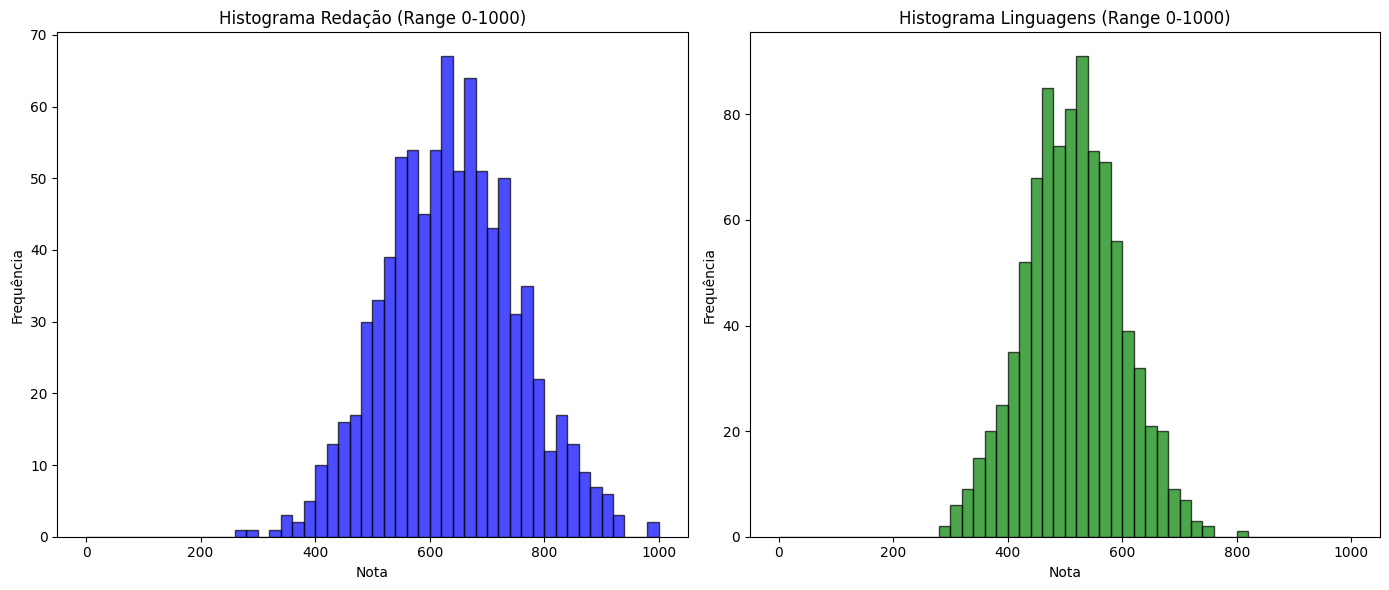

In [41]:
plt.figure(figsize=(14, 6))

# Histograma Redação com range fixo
plt.subplot(1, 2, 1)
plt.hist(df['Redação'].dropna(), bins=50, range=[0, 1000], color='blue', alpha=0.7, edgecolor='black')
plt.title('Histograma Redação (Range 0-1000)')
plt.xlabel('Nota')
plt.ylabel('Frequência')

# Histograma Linguagens com range fixo
plt.subplot(1, 2, 2)
plt.hist(df['Linguagens'].dropna(), bins=50, range=[0, 1000], color='green', alpha=0.7, edgecolor='black')
plt.title('Histograma Linguagens (Range 0-1000)')
plt.xlabel('Nota')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

# Questão 8

Faça um boxplot para as notas de Ciências da Natureza e Redação, analisando os quartis e identificando possíveis outliers. Utilize o método IQR (Intervalo Interquartílico)
para essa análise.

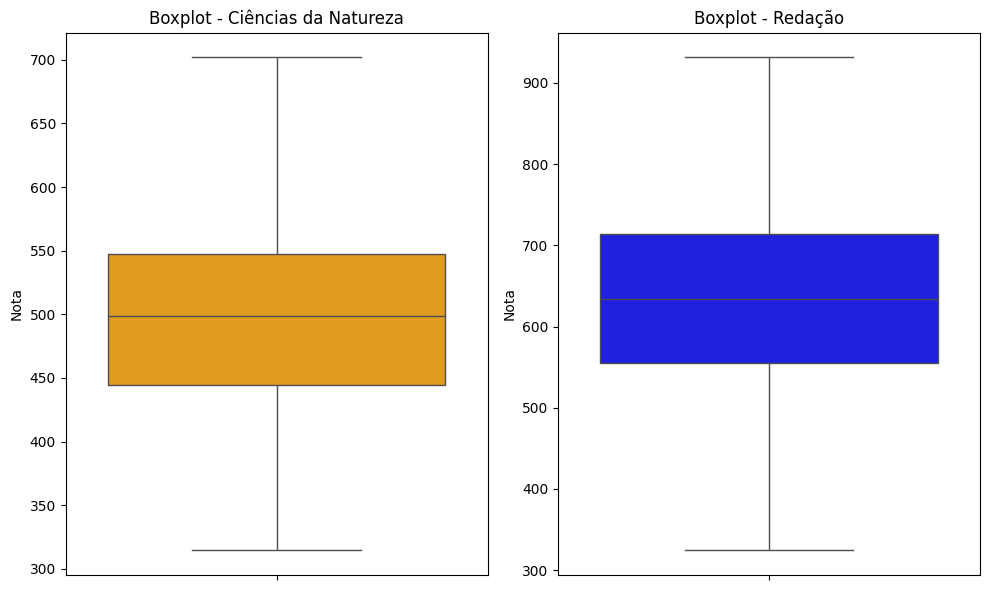

Outliers em Ciências da Natureza: []
Outliers em Redação: []


In [64]:
import seaborn as sns

#Criando os boxplots
plt.figure(figsize=(10, 6))

#Boxplot para Ciências da Natureza
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Ciências da natureza'], color='orange')
plt.title('Boxplot - Ciências da Natureza')
plt.ylabel('Nota')

#Boxplot para Redação
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Redação'], color='blue')
plt.title('Boxplot - Redação')
plt.ylabel('Nota')

plt.tight_layout()
plt.show()


#Calculando IQR e identificando outliers
def identificar_outliers_iqr(dados):
    Q1 = dados.quantile(0.25)
    Q3 = dados.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = dados[(dados < limite_inferior) | (dados > limite_superior)]
    return outliers

outliers_ciencias_naturais = identificar_outliers_iqr(df['Ciências da natureza'])
outliers_redacao = identificar_outliers_iqr(df['Redação'])

print(f"Outliers em Ciências da Natureza: {outliers_ciencias_naturais.tolist()}")
print(f"Outliers em Redação: {outliers_redacao.tolist()}")

# Questão 9

Remova todos os outliers e verifique se eles são passíveis de alterar a média nacional significativamente? (considere significativamente um valor acima de 5%).

In [60]:
#Identificar e remover outliers (usando o método IQR da questão anterior)
def identificar_outliers_iqr(dados):
    Q1 = dados.quantile(0.25)
    Q3 = dados.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = dados[(dados < limite_inferior) | (dados > limite_superior)]
    return outliers

#Calcular a média original
media_original = df[['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']].mean()

#Removendo os outliers do DataFrame
for coluna in ['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']:
    outliers = identificar_outliers_iqr(df[coluna])
    df = df[~df[coluna].isin(outliers)]

#Calcular a media sem os outliers
media_sem_outliers = df[['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']].mean()

#Calcular a diferença percentual
diferenca_percentual = abs((media_sem_outliers - media_original) / media_original) * 100

#Verificar se a diferença é significativa
significativo = diferenca_percentual > 5

#Imprimir os resultados
print("Média original:")
print(media_original)
print("\nMédia sem outliers:")
print(media_sem_outliers)
print("\nDiferença percentual:")
print(diferenca_percentual)
print("\nSignificativo:", significativo)

Média original:
Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64

Média sem outliers:
Linguagens              513.914745
Ciências humanas        525.912524
Ciências da natureza    497.908755
Matemática              535.685299
Redação                 636.332929
dtype: float64

Diferença percentual:
Linguagens              0.118568
Ciências humanas        0.214358
Ciências da natureza    0.281751
Matemática              0.052310
Redação                 0.227444
dtype: float64

Significativo: Linguagens              False
Ciências humanas        False
Ciências da natureza    False
Matemática              False
Redação                 False
dtype: bool


# Questão 10
Considerando valores nulos, tente encontrar qual seria a melhor medida de tendência que pode substituir as notas nulas. Média, moda ou mediana? Substitua o valor por todos os três e diga qual delas altera menos a média geral e o desvio padrão.

In [63]:
#Excluindo coluna sexo por não ser necessária na analise
df = df.drop(columns=['Sexo'])

In [65]:
media_original = df.mean()
desvio_padrao_original = df.std()

In [66]:
df_media = df.fillna(df.mean())
media_com_media = df_media.mean()
desvio_padrao_com_media = df_media.std()

In [67]:
df_mediana = df.fillna(df.median())
media_com_mediana = df_mediana.mean()
desvio_padrao_com_mediana = df_mediana.std()

In [68]:
df_moda = df.fillna(df.mode().iloc[0])
media_com_moda = df_moda.mean()
desvio_padrao_com_moda = df_moda.std()

In [69]:
print("Mudança na média:")
print("Com média:", abs(media_com_media - media_original))
print("Com mediana:", abs(media_com_mediana - media_original))
print("Com moda:", abs(media_com_moda - media_original))

print("\nMudança no desvio padrão:")
print("Com média:", abs(desvio_padrao_com_media - desvio_padrao_original))
print("Com mediana:", abs(desvio_padrao_com_mediana - desvio_padrao_original))
print("Com moda:", abs(desvio_padrao_com_moda - desvio_padrao_original))

Mudança na média:
Com média: Linguagens              0.000000e+00
Ciências humanas        0.000000e+00
Ciências da natureza    5.684342e-14
Matemática              0.000000e+00
Redação                 0.000000e+00
dtype: float64
Com mediana: Linguagens              0.085653
Ciências humanas        0.145497
Ciências da natureza    0.189650
Matemática              0.197077
Redação                 0.256657
dtype: float64
Com moda: Linguagens              21.340390
Ciências humanas        13.468905
Ciências da natureza    32.085887
Matemática              16.555621
Redação                 43.401852
dtype: float64

Mudança no desvio padrão:
Com média: Linguagens              4.383546
Ciências humanas        2.522358
Ciências da natureza    7.095499
Matemática              3.326407
Redação                 8.155699
dtype: float64
Com mediana: Linguagens              4.383138
Ciências humanas        2.520291
Ciências da natureza    7.094290
Matemática              3.323540
Redação             